In [1]:
# DO NOT RUN THIS CELL MULTIPLE TIMES!
if "is_run" not in locals():
    #!ls
    %cd ..
    import os
    import sys
    from pathlib import Path
    import json
    import numpy as np
    import pandas as pd
    from rdkit import Chem
    from rdkit.Chem import AllChem
    from rdkit.Chem import PandasTools
    from rdkit.Chem import Descriptors
    from rdkit import DataStructs
    from rdkit.Chem.rdmolfiles import MaeMolSupplier
    from rdkit.Chem import Draw

    # from rdkit.Chem.Draw import rdDepictor
    from rdkit.Chem.Draw import IPythonConsole
    from rdkit import rdBase
    from rdkit import RDConfig

    # from rdkit import Chem
    from rdkit.Chem.Draw import IPythonConsole

    IPythonConsole.ipython_useSVG = (
        True  # < set this to False if you want PNGs instead of SVGs
    )
    # dir(IPythonConsole)
    IPythonConsole.molSize = (900, 300)  # (450, 150)
    IPythonConsole.drawOptions.addStereoAnnotation = True
    IPythonConsole.drawOptions.annotationFontScale = 1.5
    # IPythonConsole.drawOptions.minFontSize=15
    # sys.path.append('../')
    sys.path.append("./libs")
    import src
    from PepLibGen.StructGen import StructGen as sg

    # Which rdkit version?
    # print(rdBase.rdkitVersion)
    is_run = True
    from src.utils import dotdict

/biggin/b147/univ4859/research/03_macroconf


### Compound 62

id Macroconf-v2 excel file: 62

reference no: 18

name of the structure (number) in the reference: 6BER (10.2)

In [2]:
index = 62
with open(f"./data/interim/refactor-test/{index}/data.json", "r") as f:
    compound = json.load(f)

compound = dotdict(compound)
compound.keys()

dict_keys(['index', 'solvent', 'seq_length', 'bonds', 'sequence', 'sequence_1', 'natural_cyclic_peptide', 'non_natural_cyclic_peptide', 'smile'])

In [3]:
compound.sequence_1

'EvDPehpNap'

In [4]:
pdb_amber = (
    f"./data/interim/refactor-test/{index}/H2O/1_make_topology/mc_gas.pdb"
)
mol_amber = (
    f"./data/interim/refactor-test/{index}/H2O/1_make_topology/mc_gas.mol2"
)

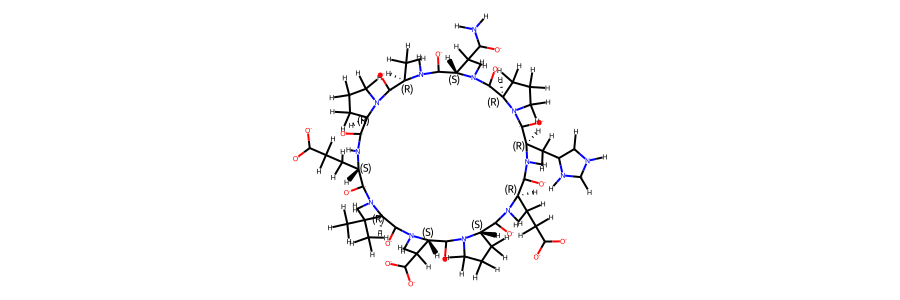

In [5]:
# Read in pdb file from amber
# mol_ref = Chem.MolFromPDBFile(pdb_amber, removeHs=False, proximityBonding=True) #removeHs=True, proximityBonding=True)
mol_ref = Chem.MolFromMol2File(
    mol_amber,
    removeHs=False,
)
mol_ref.RemoveAllConformers()
mol_ref

In [6]:
mol_ref.GetNumAtoms()

142

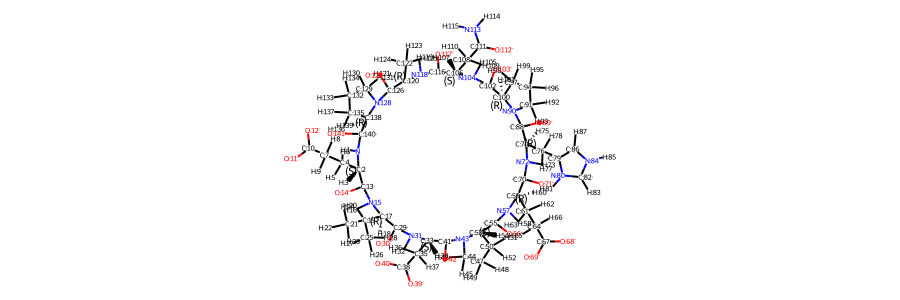

In [7]:
src.utils.mol_with_atom_index(mol_ref)

In [8]:
# Now the NOE assignment starts. Follow the instructions when running the below cells.
# Need to provide a csv file with the NOEs from the paper. The first two colums must be atom names, further columns
# should contain distances. The format can be specified below: D: distance, A: mAximum, I: mInimum, -: do not use.
# Also provide a scaling factor, s.t the NOEs are converted to Angstrom.

In [9]:
hist = {
    "resid 1 and name HA": [2],
    "resid 1 and name HB1": [4],
    "resid 1 and name HB2": [4],
    "resid 1 and name HG#": [7],
    "resid 1 and name HN": [0],
    "resid 10 and name HA": [138],
    "resid 10 and name HB1": [135],
    "resid 10 and name HB2": [135],
    "resid 10 and name HD1": [129],
    "resid 10 and name HD2": [129],
    "resid 10 and name HG#": [132],
    "resid 2 and name HA": [17],
    "resid 2 and name HB": [19],
    "resid 2 and name HG*": [21, 25],
    "resid 2 and name HN": [15],
    "resid 3 and name HA": [33],
    "resid 3 and name HB1": [35],
    "resid 3 and name HB2": [35],
    "resid 3 and name HN": [31],
    "resid 4 and name HA": [53],
    "resid 4 and name HB1": [50],
    "resid 4 and name HB2": [50],
    "resid 4 and name HD1": [44],
    "resid 4 and name HD2": [44],
    "resid 4 and name HG#": [47],
    "resid 5 and name HA": [59],
    "resid 5 and name HB1": [61],
    "resid 5 and name HB2": [61],
    "resid 5 and name HG#": [64],
    "resid 5 and name HN": [57],
    "resid 6 and name HA": [74],
    "resid 6 and name HB1": [76],
    "resid 6 and name HB2": [76],
    "resid 6 and name HD2": [86],
    "resid 6 and name HN": [72],
    "resid 7 and name HA": [100],
    "resid 7 and name HB1": [97],
    "resid 7 and name HB2": [97],
    "resid 7 and name HD1": [91],
    "resid 7 and name HD2": [91],
    "resid 7 and name HG1": [94],
    "resid 7 and name HG2": [94],
    "resid 8 and name HA": [106],
    "resid 8 and name HB1": [108],
    "resid 8 and name HB2": [108],
    "resid 8 and name HD21": [113],
    "resid 8 and name HD22": [113],
    "resid 8 and name HN": [104],
    "resid 9 and name HA": [120],
    "resid 9 and name HB#": [122],
    "resid 9 and name HN": [118],
}
style = "DIA"
scaling = 1
# what seems off: Tyr2:CG?? Phe7(CG)

In [10]:
csv = "./data/external/raw_noes/62_6ber.csv"
# NOE_auto, *_ = src.noe.getNOE(mol_ref, csv, style=style, scaling=scaling)
NOE_auto, NOE_df = src.noe.getNOE(mol_ref, csv, hist, style, scaling)

         Atom 1      Atom 2  NMR exp  lower bound  upper bound
0          (3,)        (1,)      3.5          1.2          1.2
1          (3,)       (16,)      3.5          1.2          1.2
2          (3,)       (32,)      4.5          1.6          1.6
3         (18,)       (16,)      3.5          1.2          1.2
4         (18,)       (32,)      3.5          1.2          1.2
..          ...         ...      ...          ...          ...
196  (130, 131)      (119,)      4.5          1.6          1.6
197  (130, 131)      (139,)      4.5          1.6          1.6
198  (130, 131)  (136, 137)      4.5          1.6          1.6
199  (133, 134)      (121,)      4.5          1.6          1.6
200  (133, 134)      (119,)      4.5          1.6          1.6

[201 rows x 5 columns]
{'resid 1 and name HA': [2], 'resid 1 and name HB1': [4], 'resid 1 and name HB2': [4], 'resid 1 and name HG#': [7], 'resid 1 and name HN': [0], 'resid 10 and name HA': [138], 'resid 10 and name HB1': [135], 'resid 10 and

In [11]:
# adjust upper lower bounds
NOE_df["lower bound"] = NOE_df["NMR exp"] - NOE_df["lower bound"]
NOE_df["upper bound"] = NOE_df["NMR exp"] + NOE_df["upper bound"]
NOE_auto = NOE_df.to_dict(orient="index")

In [12]:
NOE_output = {f"{index}": NOE_auto}
# save as .json file
with open(f"./data/interim/refactor-test/{index}/NOE.json", "w") as f:
    json.dump(NOE_output, f)